<img src="./logo.png" width="5%">
<h1 style='text-align:center'>Project: TMDB Movies Dataset Analysis</h1>

>**BY TheACJ** AGBAI C JOSHUA



# **Table of Contents**

- Introduction
- Data Wrangling
- Exploratory Data Analysis
-Conclusions

# **INTRODUCTION**


Dataset Description

This data set contains information about 10,000 movies collected from The Movie Database (TMDB), including user ratings and revenue. It is a compilation of two (2) dataset (movies and credits) to form a dataset. The total number of columns are 23, for the course of this analysis, only 12 columns were used.

# **Question(s) for Analysis**

Below are the questions that would be addressed over the course of the project report. The questions were derived after a critical view of the data set, as well as the available data attributed to the movie. These questions are inquiries that enables a better understanding of what goes on during and after movie production.

Question 1: What is an accurate measurement for the financial success of a movie?

Question 2: Does higher budget mean higher popularity ?

Question 3: Do the runtime affect the vote count and popularity?

Question 4: What columns contributes to the large form of success of a movie?

Question 5: Investigate the relationship between a movie's budget and its revenue.

Question 6: Which genre earns the most profit?

Question 7: Does Higher popularity means higher profits?

Question 8: Are there specific release dates or periods that tend to generate high revenues or better rating?

Question 9: Do longer movies have better rating or higher revenues?

Question 10: What are the Features Associated with Top 10 Most Profitable Movies?


In [1]:
# For this project, I will be using NumPy, Pandas and MatPlotLib frameworks to wrangle and explore my dataset, as well as
# for aided visualisations of the results.
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Pre-Processing

> In this section I will be cleaning, transforming, and organizing the raw data into a usable format for this analysis. This includes tasks such as handling missing values, filtering data, converting data types, and creating new features, ensuring that the dataset is accurate and ready for exploration or modeling.
It's an essential step in this data analysis process as it prepares data for insightful interpretation and decision-making..  Below are steps involved in this section

>1. **Data Cleaning**: This step addresses missing values, removes duplicates, and corrects errors. It ensures the data is accurate and consistent.
>2. **Data Integration**: Combining different data from different to provide a more suffisticated dataset.
>3. **Data Transformation**: Converting data into a suitable format or datatype for analysis.
>4. **Data Reduction**: Reducing the volume of data while maintaining its integrity.


In [2]:
# Load your data and print out a first 5 few lines. 
movies = pd.read_csv('data/movies_metadata.csv')
movies.head()

C:\Users\TheAC\AppData\Local\Temp\ipykernel_11632\967520316.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('data/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
# check the shape of the data, number of rows, as well as the columns in the dataset
movies.shape

(45466, 24)

In [4]:
# to check out the datatypyes and the presence of missing values (null values), use the info syntax.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
# to find duplicate rows in a data set; df_movies.duplicated() (the response would be a boolean/logic one that is true or false)
# given that we are working with a large dataset, we need to know the exact number of duplicated rows
sum(movies.duplicated())

13

In [6]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [7]:
from numpy import astype


movies['release_date'] = pd.to_datetime(movies.release_date, errors='coerce')
# numeric columns as object datatype
cols = ['id','budget','popularity']
# remove any rows where any of the specified columns contains any non numeric values
movies[cols]= movies[cols].apply(lambda x:pd.to_numeric(x, errors='coerce'))
movies[cols] = movies[cols].dropna(subset=cols)
 
#
# seperate all the numeric data in a different dataframe
movies1 = movies.select_dtypes(include=["float64"])
# Use the mean of the various columns to fill null values
movies1.fillna(movies1.mean(), inplace=True)
# Update the original movies columns with movies1 columns
movies[movies1.columns]= movies1


movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  4494 non-null   object        
 2   budget                 45466 non-null  float64       
 3   genres                 45466 non-null  object        
 4   homepage               7782 non-null   object        
 5   id                     45466 non-null  float64       
 6   imdb_id                45449 non-null  object        
 7   original_language      45455 non-null  object        
 8   original_title         45466 non-null  object        
 9   overview               44512 non-null  object        
 10  popularity             45466 non-null  float64       
 11  poster_path            45080 non-null  object        
 12  production_companies   45463 non-null  object        
 13  p

In [8]:
#movies.dropna(inplace = True)
movies.id = pd.to_numeric(movies.id, errors='coerce').astype(np.int64)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  4494 non-null   object        
 2   budget                 45466 non-null  float64       
 3   genres                 45466 non-null  object        
 4   homepage               7782 non-null   object        
 5   id                     45466 non-null  int64         
 6   imdb_id                45449 non-null  object        
 7   original_language      45455 non-null  object        
 8   original_title         45466 non-null  object        
 9   overview               44512 non-null  object        
 10  popularity             45466 non-null  float64       
 11  poster_path            45080 non-null  object        
 12  production_companies   45463 non-null  object        
 13  p

In [9]:
# next is the tmdb credit data set
credits = pd.read_csv('data/credits.csv')

In [10]:
# load the Thecredits dataset, and view the first 5 rows of the dataframe
credits.id = pd.to_numeric(credits.id, errors='coerce').astype(np.int64)
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [11]:
# check the shape of the data, number of rows, as well as the columns in the dataset
credits.shape

(45476, 3)

In [12]:
# to check out the datatypyes and the presence of missing values (null values), use the info syntax.
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


> Unlike the movies data set with missing values, the credit data set info syntax shows that there are no missing values in the columns. From 1st & 2nd dataset we can see that, both datasets contains data about the same movies so, merging both data is the next thing to do.
After this I will nrun preliminary checks on the new data set

In [13]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  4494 non-null   object        
 2   budget                 45466 non-null  float64       
 3   genres                 45466 non-null  object        
 4   homepage               7782 non-null   object        
 5   id                     45466 non-null  int64         
 6   imdb_id                45449 non-null  object        
 7   original_language      45455 non-null  object        
 8   original_title         45466 non-null  object        
 9   overview               44512 non-null  object        
 10  popularity             45466 non-null  float64       
 11  poster_path            45080 non-null  object        
 12  production_companies   45463 non-null  object        
 13  p

In [14]:
df_movies = movies.merge(credits, on='id', how='left')
df_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [15]:
df_movies.shape

(45542, 26)

In [16]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45542 entries, 0 to 45541
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45542 non-null  object        
 1   belongs_to_collection  4503 non-null   object        
 2   budget                 45542 non-null  float64       
 3   genres                 45542 non-null  object        
 4   homepage               7795 non-null   object        
 5   id                     45542 non-null  int64         
 6   imdb_id                45525 non-null  object        
 7   original_language      45531 non-null  object        
 8   original_title         45542 non-null  object        
 9   overview               44588 non-null  object        
 10  popularity             45542 non-null  float64       
 11  poster_path            45156 non-null  object        
 12  production_companies   45539 non-null  object        
 13  p

<a id='wrangling'></a>
## Data Pre-Processing >>>>

> At this point, making the data set more understandable is the next step. Removing irrelevant features, checking and dropping missing values. The total number of columns are 24, for the course of this analysis, only 12 columns would be used.

In [17]:
# Creating a new dataframe for the columns we would be working with
df_N_movies=df_movies[['revenue', 'title', 'budget', 'genres', 'popularity',  'production_companies', 'release_date', 'vote_average', 'vote_count', 'runtime', 'cast', 'crew']]
df_N_movies.head()

,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew
0,373554033.0,Toy Story,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,7.7,5415.0,81.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,262797249.0,Jumanji,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,6.9,2413.0,104.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,0.0,Grumpier Old Men,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,6.5,92.0,101.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,81452156.0,Waiting to Exhale,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,6.1,34.0,127.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,76578911.0,Father of the Bride Part II,0.0,"[{'id': 35, 'name': 'Comedy'}]",8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,5.7,173.0,106.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [18]:
# to view the exact number of missing values for each column should incase you are working with a large data set
df_N_movies.isnull().sum()

revenue                  0
title                    6
budget                   0
genres                   0
popularity               0
production_companies     3
release_date            90
vote_average             0
vote_count               0
runtime                  0
cast                     7
crew                     7
dtype: int64

In [19]:
# drop missing values
df_N_movies.dropna(inplace=True)
df_N_movies.isnull().sum()

C:\Users\TheAC\AppData\Local\Temp\ipykernel_11632\3393478468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N_movies.dropna(inplace=True)


revenue                 0
title                   0
budget                  0
genres                  0
popularity              0
production_companies    0
release_date            0
vote_average            0
vote_count              0
runtime                 0
cast                    0
crew                    0
dtype: int64

In [20]:
df_N_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45451 entries, 0 to 45541
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   revenue               45451 non-null  float64       
 1   title                 45451 non-null  object        
 2   budget                45451 non-null  float64       
 3   genres                45451 non-null  object        
 4   popularity            45451 non-null  float64       
 5   production_companies  45451 non-null  object        
 6   release_date          45451 non-null  datetime64[ns]
 7   vote_average          45451 non-null  float64       
 8   vote_count            45451 non-null  float64       
 9   runtime               45451 non-null  float64       
 10  cast                  45451 non-null  object        
 11  crew                  45451 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 4.5+ MB


<a id='wrangling'></a>
## Text Handling

> Here it is neccessary to change the arrangement of the text in some columns by Formatting; genres, cast & crew columns

In [21]:
df_N_movies['genres'].iloc[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [22]:
df_N_movies['genres'].info()

<class 'pandas.core.series.Series'>
Index: 45451 entries, 0 to 45541
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
45451 non-null  object
dtypes: object(1)
memory usage: 710.2+ KB


> The data type of the genre column is string, so first we have to convert it into the list.

> Next is to import Ast and create a function for converting the column values into string & creating a seperate list containing only genres.

In [23]:
import ast
ast.literal_eval('[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]')

[{'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 28, 'name': 'Action'}]

In [24]:
def extract(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [25]:
# To convert
convert: any ('[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]')

In [26]:
df_N_movies['genres'] = df_N_movies['genres'].apply(extract)
df_N_movies.head()

C:\Users\TheAC\AppData\Local\Temp\ipykernel_11632\2278747125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N_movies['genres'] = df_N_movies['genres'].apply(extract)


,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew
0,373554033.0,Toy Story,30000000.0,"[Animation, Comedy, Family]",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,7.7,5415.0,81.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,262797249.0,Jumanji,65000000.0,"[Adventure, Fantasy, Family]",17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,6.9,2413.0,104.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,0.0,Grumpier Old Men,0.0,"[Romance, Comedy]",11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,6.5,92.0,101.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,81452156.0,Waiting to Exhale,16000000.0,"[Comedy, Drama, Romance]",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,6.1,34.0,127.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,76578911.0,Father of the Bride Part II,0.0,[Comedy],8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,5.7,173.0,106.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


> We would be extracting just the names of the production companies

In [27]:
movies['production_companies']

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
45464                 [{'name': 'Yermoliev', 'id': 88753}]
45465                                                   []
Name: production_companies, Length: 45466, dtype: object

In [28]:
def extract(obj):
    L = []
    try:
        for i in ast.literal_eval(obj):
            L.append(i['name'])
    except (ValueError, TypeError):
        # Handle NaN or invalid input
        pass
    return L

# Apply the function, skipping NaN values
#df_N_movies['production_companies'] = movies['production_companies'].apply(extract)
df_N_movies['production_companies'] = movies['production_companies'].apply(extract)
df_N_movies.head()

C:\Users\TheAC\AppData\Local\Temp\ipykernel_11632\2068139031.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N_movies['production_companies'] = movies['production_companies'].apply(extract)


,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew
0,373554033.0,Toy Story,30000000.0,"[Animation, Comedy, Family]",21.946943,[Pixar Animation Studios],1995-10-30,7.7,5415.0,81.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,262797249.0,Jumanji,65000000.0,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",1995-12-15,6.9,2413.0,104.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,0.0,Grumpier Old Men,0.0,"[Romance, Comedy]",11.712900,"[Warner Bros., Lancaster Gate]",1995-12-22,6.5,92.0,101.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,81452156.0,Waiting to Exhale,16000000.0,"[Comedy, Drama, Romance]",3.859495,[Twentieth Century Fox Film Corporation],1995-12-22,6.1,34.0,127.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,76578911.0,Father of the Bride Part II,0.0,[Comedy],8.387519,"[Sandollar Productions, Touchstone Pictures]",1995-02-10,5.7,173.0,106.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


> Here we can observe that, there are many cast mentioned in the cast column, So we are going to extract 3 original names from each cast

In [29]:
# create a function to edit the cast column and select the first 3
def convert3(obj):
    L=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter !=3:
            L.append(i['name'])
            counter=counter+1

        else:
            break

    return L

In [30]:
# Input function
df_N_movies['cast'] = df_N_movies['cast'].apply(convert3)
df_N_movies.head()

C:\Users\TheAC\AppData\Local\Temp\ipykernel_11632\3124576471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N_movies['cast'] = df_N_movies['cast'].apply(convert3)


,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew
0,373554033.0,Toy Story,30000000.0,"[Animation, Comedy, Family]",21.946943,[Pixar Animation Studios],1995-10-30,7.7,5415.0,81.0,"[Tom Hanks, Tim Allen, Don Rickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,262797249.0,Jumanji,65000000.0,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",1995-12-15,6.9,2413.0,104.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,0.0,Grumpier Old Men,0.0,"[Romance, Comedy]",11.712900,"[Warner Bros., Lancaster Gate]",1995-12-22,6.5,92.0,101.0,"[Walter Matthau, Jack Lemmon, Ann-Margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,81452156.0,Waiting to Exhale,16000000.0,"[Comedy, Drama, Romance]",3.859495,[Twentieth Century Fox Film Corporation],1995-12-22,6.1,34.0,127.0,"[Whitney Houston, Angela Bassett, Loretta Devine]","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,76578911.0,Father of the Bride Part II,0.0,[Comedy],8.387519,"[Sandollar Productions, Touchstone Pictures]",1995-02-10,5.7,173.0,106.0,"[Steve Martin, Diane Keaton, Martin Short]","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [31]:
# create a function to extract just the director's name
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break

    return L

In [32]:
# Input function
df_N_movies['crew'] = df_N_movies['crew'].apply(fetch_director)
df_N_movies.head()

C:\Users\TheAC\AppData\Local\Temp\ipykernel_11632\4118808422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N_movies['crew'] = df_N_movies['crew'].apply(fetch_director)


,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew
0,373554033.0,Toy Story,30000000.0,"[Animation, Comedy, Family]",21.946943,[Pixar Animation Studios],1995-10-30,7.7,5415.0,81.0,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter]
1,262797249.0,Jumanji,65000000.0,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",1995-12-15,6.9,2413.0,104.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston]
2,0.0,Grumpier Old Men,0.0,"[Romance, Comedy]",11.712900,"[Warner Bros., Lancaster Gate]",1995-12-22,6.5,92.0,101.0,"[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch]
3,81452156.0,Waiting to Exhale,16000000.0,"[Comedy, Drama, Romance]",3.859495,[Twentieth Century Fox Film Corporation],1995-12-22,6.1,34.0,127.0,"[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker]
4,76578911.0,Father of the Bride Part II,0.0,[Comedy],8.387519,"[Sandollar Productions, Touchstone Pictures]",1995-02-10,5.7,173.0,106.0,"[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer]


In [33]:
# create a mask to remove values less than a hundred thousand in the budget column
df_New = df_N_movies[df_N_movies['budget']>=100000]
df_New.tail(15)

,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew
45344,0.0,"Good Guys Go to Heaven, Bad Guys Go to Pattaya",5402000.0,[Comedy],5.613875,[Instituto Cubano del Arte e Industrias Cinema...,2016-02-24,5.3,153.0,100.0,"[Ramzy Bedia, Malik Bentalha, Franck Gastambide]",[Franck Gastambide]
45354,0.0,Baby sa jakies inne,1689118.0,"[Comedy, Drama]",0.275503,"[Artisan Entertainment, The Kaufman Company]",2011-10-14,4.8,4.0,90.0,"[Adam Woronowicz, Robert Więckiewicz, Małgorza...",[Marek Koterski]
45378,0.0,Upperdog,3417000.0,"[Comedy, Drama]",1.056898,[],2009-08-28,6.9,5.0,95.0,"[Hermann Sabado, Agnieszka Grochowska, Mads Sj...",[Sara Johnsen]
45419,0.0,The Visitors: Bastille Day,25868826.0,[Comedy],7.294920,[Lumière],2016-03-23,4.0,167.0,110.0,"[Jean Reno, Christian Clavier, Franck Dubosc]",[Jean-Marie Poiré]
45422,0.0,High Plains Invaders,2000000.0,"[Western, Science Fiction]",1.225217,[],2009-08-30,5.3,9.0,87.0,"[James Marsters, Cindy Sampson, Sebastian Knapp]",[Kristoffer Tabori]
45428,0.0,House of the Long Shadows,7500000.0,"[Horror, Comedy, Mystery]",1.185515,[Malibu Bay Films],1983-06-17,6.1,18.0,100.0,"[Vincent Price, Christopher Lee, Peter Cushing]",[Pete Walker]
45442,0.0,Dawn of the Mummy,500000.0,[Horror],0.283443,[],1981-12-11,3.6,8.0,93.0,"[Brenda Siemer Scheider, Barry Sattels, George...",[Frank Agrama]
45471,0.0,Dead Daughters,1200000.0,"[Drama, Horror]",0.355732,NaN,2007-02-01,4.9,5.0,123.0,"[Yekaterina Shcheglova, Mikhail Dementyev, Nik...",[Pavel Ruminov]
45474,0.0,Thick Lashes of Lauri Mäntyvaara,1254040.0,"[Romance, Comedy]",0.347806,NaN,2017-07-28,8.0,1.0,90.0,"[Inka Haapamäki, Rosa Honkonen, Tiitus Rantala]",[Hannaleena Hauru]
45475,3.0,All at Once,750000.0,"[Crime, Comedy]",0.201582,NaN,2014-06-05,6.0,4.0,0.0,"[Andrey Muravyov, Yuliya Khlynina, Anton Shurt...",[Roman Karimov]


In [34]:
# create a mask to remove values less than 2 hundred thousand within the revenue column
df_New = df_New[df_New['revenue']>200000]
df_New.tail(15)

,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew
44864,56100000.0,Confidential Assignment,8520000.0,"[Action, Drama, Comedy]",1.758590,[Yuzu Productions],2017-01-18,6.2,5.0,125.0,"[Hyun Bin, Yoo Hae-jin, Kim Joo-hyuk]",[Sung-hoon Kim]
44894,68411275.0,Pokémon: Spell of the Unknown,16000000.0,"[Adventure, Fantasy, Animation, Action, Family]",6.480376,"[Ringleader Studios, Phantom Planet Films, Kar...",2000-07-08,6.0,144.0,93.0,"[Veronica Taylor, Rachael Lillis, Eric Stuart]",[Michael Haigney]
44895,68411275.0,Pokémon: Spell of the Unknown,16000000.0,"[Adventure, Fantasy, Animation, Action, Family]",6.480376,[Gaumont],2000-07-08,6.0,144.0,93.0,"[Veronica Taylor, Rachael Lillis, Eric Stuart]",[Michael Haigney]
44917,604942143.0,Transformers: The Last Knight,260000000.0,"[Action, Science Fiction, Thriller, Adventure]",39.186819,[AGS Entertainment],2017-06-21,6.2,1440.0,149.0,"[Mark Wahlberg, Josh Duhamel, Laura Haddock]",[Michael Bay]
44923,11666088.0,"Mommies, Happy New Year!",2000000.0,"[Comedy, Drama]",1.456046,"[Overseas FilmGroup, August Entertainment, Lar...",2012-12-27,5.3,9.0,90.0,"[Alain Delon, Elizaveta Boyarskaya, Agniya Dit...",[Sarik Andreasyan]
44925,8000000.0,Pregnant,2000000.0,[Comedy],0.397106,"[New Line Cinema, Gary Sanchez Productions]",2011-07-21,3.1,7.0,81.0,"[Dmitriy Dyuzhev, Mikhail Galustyan, Ville Haa...",[Sarik Andreasyan]
44931,1957000.0,On the Hook!,3000000.0,"[Comedy, Romance]",0.445269,"[Avalon P.C., Inicia Films]",2011-02-03,4.7,3.0,90.0,"[Ekaterina Vilkova, Konstantin Kryukov, Marat ...",[Natalya Uglitskikh]
45045,2411594.0,FC Venus,2196531.0,"[Comedy, Romance]",0.947509,[],2005-12-30,5.6,10.0,107.0,"[Minna Haapkylä, Petteri Summanen, Laura Malmi...",[Joona Tena]
45089,71000000.0,The Dark Tower,60000000.0,"[Action, Western, Science Fiction, Fantasy, Ho...",50.903593,[Mosfilm],2017-08-03,5.7,688.0,95.0,"[Idris Elba, Matthew McConaughey, Tom Taylor]",[Nikolaj Arcel]
45214,66913939.0,The Emoji Movie,50000000.0,"[Comedy, Family, Animation]",33.694599,[Gravitas Ventures],2017-07-28,5.8,327.0,86.0,"[T.J. Miller, James Corden, Anna Faris]",[Anthony Leondis]


In [35]:
df_New.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5079 entries, 0 to 45498
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   revenue               5079 non-null   float64       
 1   title                 5079 non-null   object        
 2   budget                5079 non-null   float64       
 3   genres                5079 non-null   object        
 4   popularity            5079 non-null   float64       
 5   production_companies  5076 non-null   object        
 6   release_date          5079 non-null   datetime64[ns]
 7   vote_average          5079 non-null   float64       
 8   vote_count            5079 non-null   float64       
 9   runtime               5079 non-null   float64       
 10  cast                  5079 non-null   object        
 11  crew                  5079 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 515.8+ KB


**Research Question 1** ( What movie had the most financial success?)

> The financial success of a movie can be measured using various metrics, but the most accurate measurement for the financial success of a movie is to calculate the Return On Investment (ROI) which gives the total amount generated from a movie. Then we would find which movie has the highest ROI (return on investment generated).                                                         
To find the ROI; Revenue - Budget / Budget

> First create a ROI column, so we can get the percentage of the return on investment on each movie



In [36]:
df_New['ROI'] = ((df_New['revenue'] - df_New['budget']) / df_New['budget'])* 100
df_New.head()

,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew,ROI
0,373554033.0,Toy Story,30000000.0,"[Animation, Comedy, Family]",21.946943,[Pixar Animation Studios],1995-10-30,7.7,5415.0,81.0,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],1145.180110
1,262797249.0,Jumanji,65000000.0,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",1995-12-15,6.9,2413.0,104.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],304.303460
3,81452156.0,Waiting to Exhale,16000000.0,"[Comedy, Drama, Romance]",3.859495,[Twentieth Century Fox Film Corporation],1995-12-22,6.1,34.0,127.0,"[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker],409.075975
5,187436818.0,Heat,60000000.0,"[Action, Crime, Drama, Thriller]",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",1995-12-15,7.7,1886.0,170.0,"[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann],212.394697
8,64350171.0,Sudden Death,35000000.0,"[Action, Adventure, Thriller]",5.231580,"[Universal Pictures, Imperial Entertainment, S...",1995-12-22,5.5,174.0,106.0,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...",[Peter Hyams],83.857631


In [37]:
# create the summary statistics for the budget
df_New.describe()

,revenue,budget,popularity,release_date,vote_average,vote_count,runtime,ROI
count,5.079000e+03,5.079000e+03,5079.000000,5079,5079.000000,5079.000000,5079.000000,5079.000000
mean,9.559341e+07,3.274380e+07,10.106178,2000-04-04 07:56:35.865327744,6.293365,770.185666,110.532191,405.464316
min,2.002420e+05,1.000000e+05,0.000657,1915-02-08 00:00:00,0.000000,0.000000,0.000000,-99.397555
25%,9.670932e+06,6.200000e+06,5.840224,1994-04-04 00:00:00,5.800000,91.000000,96.000000,-9.473861
50%,3.441124e+07,1.850000e+07,8.627019,2004-09-03 00:00:00,6.300000,302.000000,107.000000,114.930551
75%,1.051881e+08,4.000000e+07,11.916700,2011-03-08 00:00:00,6.900000,857.000000,121.000000,328.474091
max,2.787965e+09,3.800000e+08,547.488298,2017-08-04 00:00:00,9.100000,14075.000000,338.000000,65284.615385
std,1.694968e+08,4.073064e+07,14.122011,NaN,0.894939,1277.571382,22.081531,1802.360043


In [38]:
# sort the ROI column and check which movie has the highest ROI
df_ROI = df_New.sort_values('ROI', ascending=False)
df_ROI.head()

,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew,ROI
4322,85000000.0,The Way of the Dragon,130000.0,"[Action, Crime]",11.116474,[StudioCanal],1972-06-01,7.4,235.0,100.0,"[Bruce Lee, Nora Miao, Chuck Norris]",[Bruce Lee],65284.615385
31694,42664410.0,The Gallows,100000.0,"[Horror, Thriller]",7.515050,[],2015-07-10,4.9,370.0,87.0,"[Cassidy Gifford, Ryan Shoos, Pfeifer Brown]",[Travis Cluff],42564.410000
9476,54667954.0,Open Water,130000.0,"[Drama, Thriller]",10.652818,[],2004-08-06,5.3,320.0,79.0,"[Blanchard Ryan, Daniel Travis, Saul Stein]",[Chris Kentis],41952.272308
1913,267447150.0,Bambi,858000.0,"[Animation, Drama, Family]",13.698132,"[Universal Pictures, Cineplex-Odeon Films]",1942-08-14,6.8,1450.0,70.0,"[Donnie Dunagan, Peter Behn, Stan Alexander]",[David Hand],31070.996503
943,30000000.0,Night of the Living Dead,114000.0,[Horror],14.384198,"[Santana Pictures Corporation, Romulus Films, ...",1968-10-01,7.5,591.0,96.0,"[Duane Jones, Judith O'Dea, Karl Hardman]",[George A. Romero],26215.789474


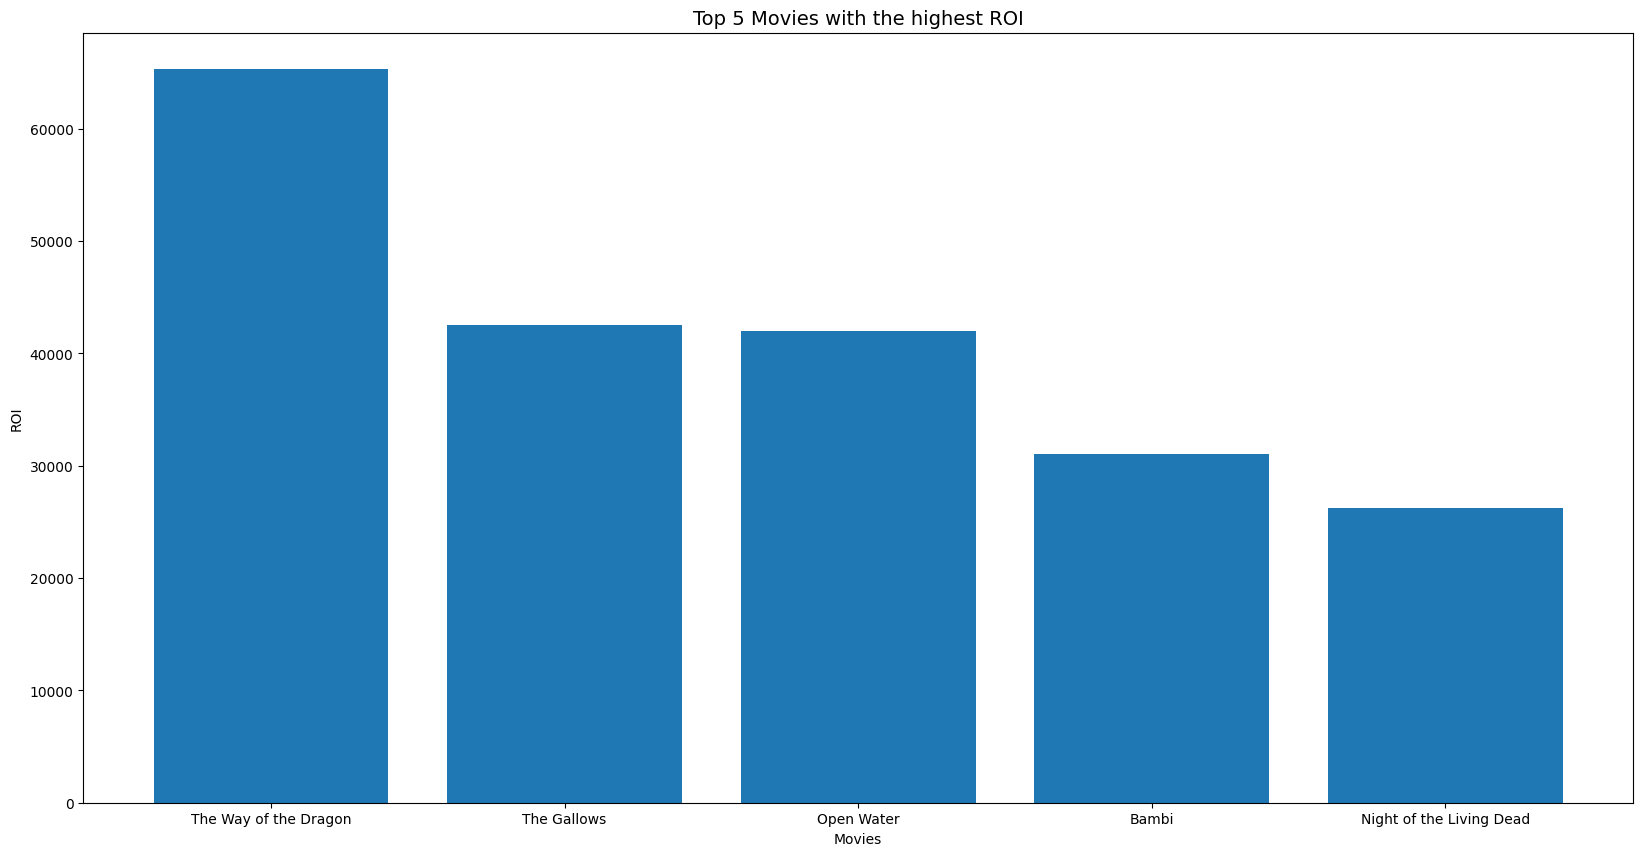

In [39]:
top5_ROI = df_ROI.nlargest(5,'ROI')
Movies = top5_ROI.title
ROI = top5_ROI.ROI
plt.figure(figsize=(20, 10))
plt.bar(Movies, ROI)
plt.title('Top 5 Movies with the highest ROI', fontsize=14)
plt.xlabel('Movies')
plt.ylabel('ROI')
plt.show()

>From the output above, the result after sorting the entire dataset by the return of investment (ROI), shows 'The Way of the Dragon' movie has the highest ROI

<hr style="font-weight:900">
<hr style="font-weight:900">

**Research Question 2** (Does higher budget mean higher popularity?)
>In this section we used bar plot and scatter plot to observe if higher budget movie gains high popularity. 

Text(0, 0.5, 'Popularity')

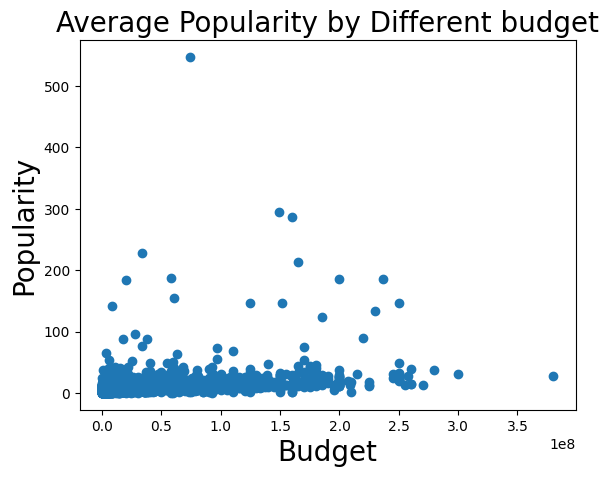

In [40]:
# plot the relation between budget and popularity 
x = df_New['budget']
y = df_New['popularity'] 

plt.scatter(x,y)
plt.title('Average Popularity by Different budget',fontsize=20)
plt.xlabel('Budget',fontsize=20)
plt.ylabel('Popularity',fontsize=20)

>As per the above scatter plot its very difficult to observe strong relationship between popularity and budget. So we use other 
method to observe the relationship between them. In this method we divide data set in to two group on the basis of median.  

In [41]:
# divide the budget into two groups : lesser_cost and more_cost.
med = df_New['budget'].median()
lesser_cost =  df_New.query('budget < {}'.format(med))
more_cost =  df_New.query('budget >= {}'.format(med))

In [42]:
# check lesser cost and more cost  mean values 
mean_low_budget = lesser_cost['popularity'].mean()
mean_high_budget = more_cost['popularity'].mean()

Text(0, 0.5, 'Mean Popularity')

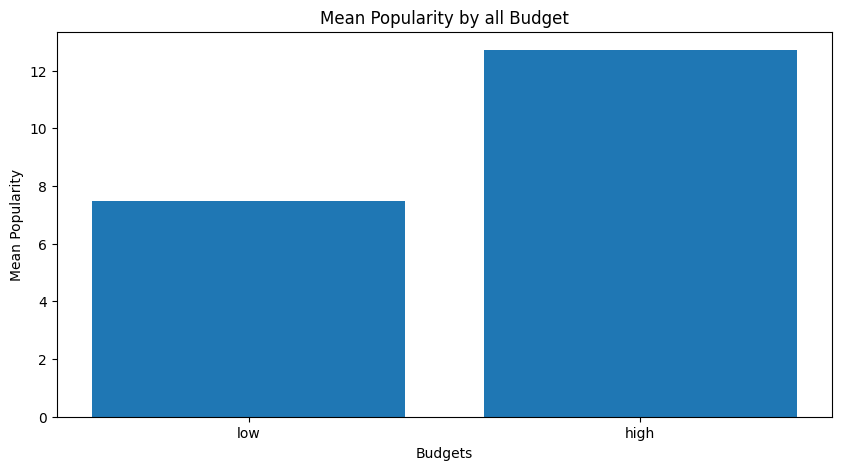

In [43]:
# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_low_budget , mean_high_budget]
labels=['low','high']
plt.figure(figsize=(10, 5))
plt.bar(locations, heights, tick_label = labels)
plt.title('Mean Popularity by all Budget')
plt.xlabel('Budgets')
plt.ylabel('Mean Popularity')

In [44]:
increase_percentage = (mean_high_budget - mean_low_budget) / mean_high_budget * 100
increase_percentage

np.float64(41.04423521423367)


>From the above bar plot we conclude that higher budget movie gains higher popularity. Higher budget movie have popularity more than the Mean popularity of lower budget movie. Which is quite interesting!!

<hr style="font-weight:900">
<hr style="font-weight:900">


**Research Question 3** (Do the runtime affect the vote count and popularity?)

> In this section we will use two plots, to simply show : <br>
If the movies within 200 minutes will be more popular or less popular. 
we will see the runtime group (in minutes) that gains higher popularity


In [45]:
# There 3 groups with query().  <100 min: lowest   , 200 min < & > 100 min: medium ,  > 200 min: highest
lowest =  df_New.query('runtime < {}'.format(100))
med =  df_New.query('runtime < {}'.format(200) and 'runtime > {}'.format(100) )
highest = df_New.query('runtime > {}'.format(200))

In [46]:
# check mean popularity of different movie lengths 
mean_of_lowest = lowest['popularity'].mean()
mean_of_med = med['popularity'].mean()
mean_of_highest = highest['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

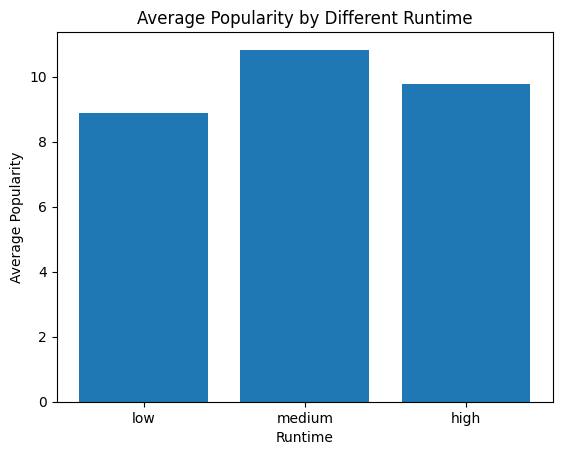

In [47]:
locations = [1,2,3]
heights = [mean_of_lowest, mean_of_med, mean_of_highest]
labels=['low','medium','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')

Text(0, 0.5, 'popularity')

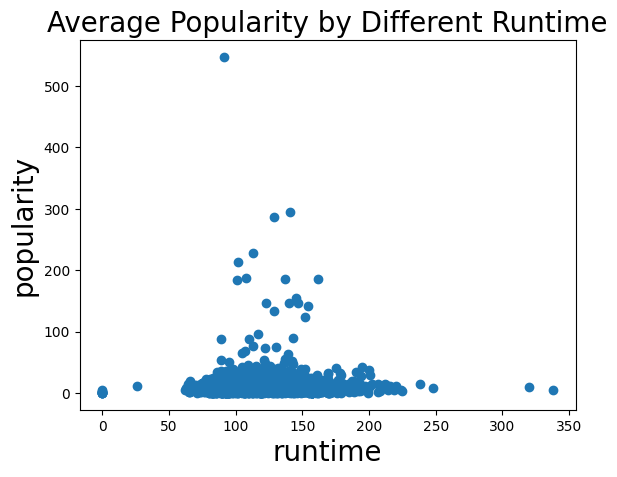

In [48]:
# scatter plot between runtime and popularity 
x = df_New['runtime']
y = df_New['popularity'] 

plt.scatter(x,y)

plt.title('Average Popularity by Different Runtime',fontsize=20)
plt.xlabel('runtime',fontsize=20)
plt.ylabel('popularity',fontsize=20)

>From the above two viz, we can simply say that 
If the movies are within 100 minutes and 200 minutes,it will be more popular. 
Once the movies run over 200 minutes, it's hard for them to gain high popularity

<hr style="font-weight:900;">
<hr style="font-weight:900;">

**Research Question 4** (What columns contributes to the large form of success of a movie?)

> To answer this question, the columns in this data set that can contribute to the large form of success of a movie are; ROI, Profit, Genres, Popularity, Production_companies, Revenue, Title, Release_date, Vote_average, Vote_count, Cast and Crew.

> A new column (profit) would be created to further find the form of success.
To find Profit; Revenue - budget

In [49]:
df_New['profit'] = (df_New['revenue'] - df_New['budget'])
df_New.head()

,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew,ROI,profit
0,373554033.0,Toy Story,30000000.0,"[Animation, Comedy, Family]",21.946943,[Pixar Animation Studios],1995-10-30,7.7,5415.0,81.0,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],1145.180110,343554033.0
1,262797249.0,Jumanji,65000000.0,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",1995-12-15,6.9,2413.0,104.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],304.303460,197797249.0
3,81452156.0,Waiting to Exhale,16000000.0,"[Comedy, Drama, Romance]",3.859495,[Twentieth Century Fox Film Corporation],1995-12-22,6.1,34.0,127.0,"[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker],409.075975,65452156.0
5,187436818.0,Heat,60000000.0,"[Action, Crime, Drama, Thriller]",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",1995-12-15,7.7,1886.0,170.0,"[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann],212.394697,127436818.0
8,64350171.0,Sudden Death,35000000.0,"[Action, Adventure, Thriller]",5.231580,"[Universal Pictures, Imperial Entertainment, S...",1995-12-22,5.5,174.0,106.0,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...",[Peter Hyams],83.857631,29350171.0


>To find the large form of success, we would run a scattered plot for visualizastion, in order to check each column, against the new (profit) column craeted.  

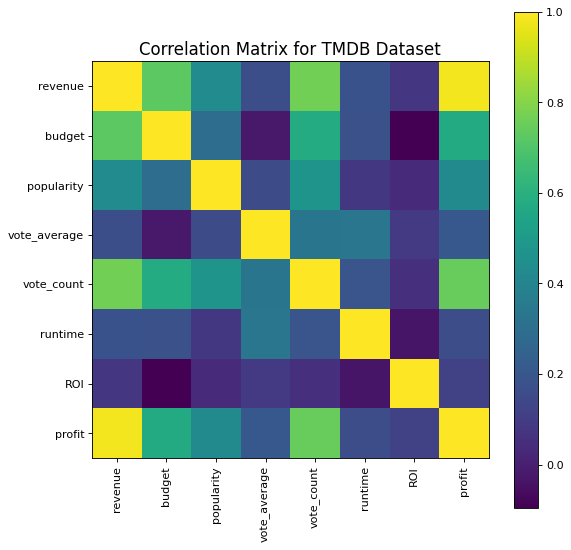

In [50]:
# Scatter Matrix
numeric_df = df_New.select_dtypes(include=('int64','float64'))
corr = numeric_df.corr()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix for TMDB Dataset', fontsize=15)
plt.show()

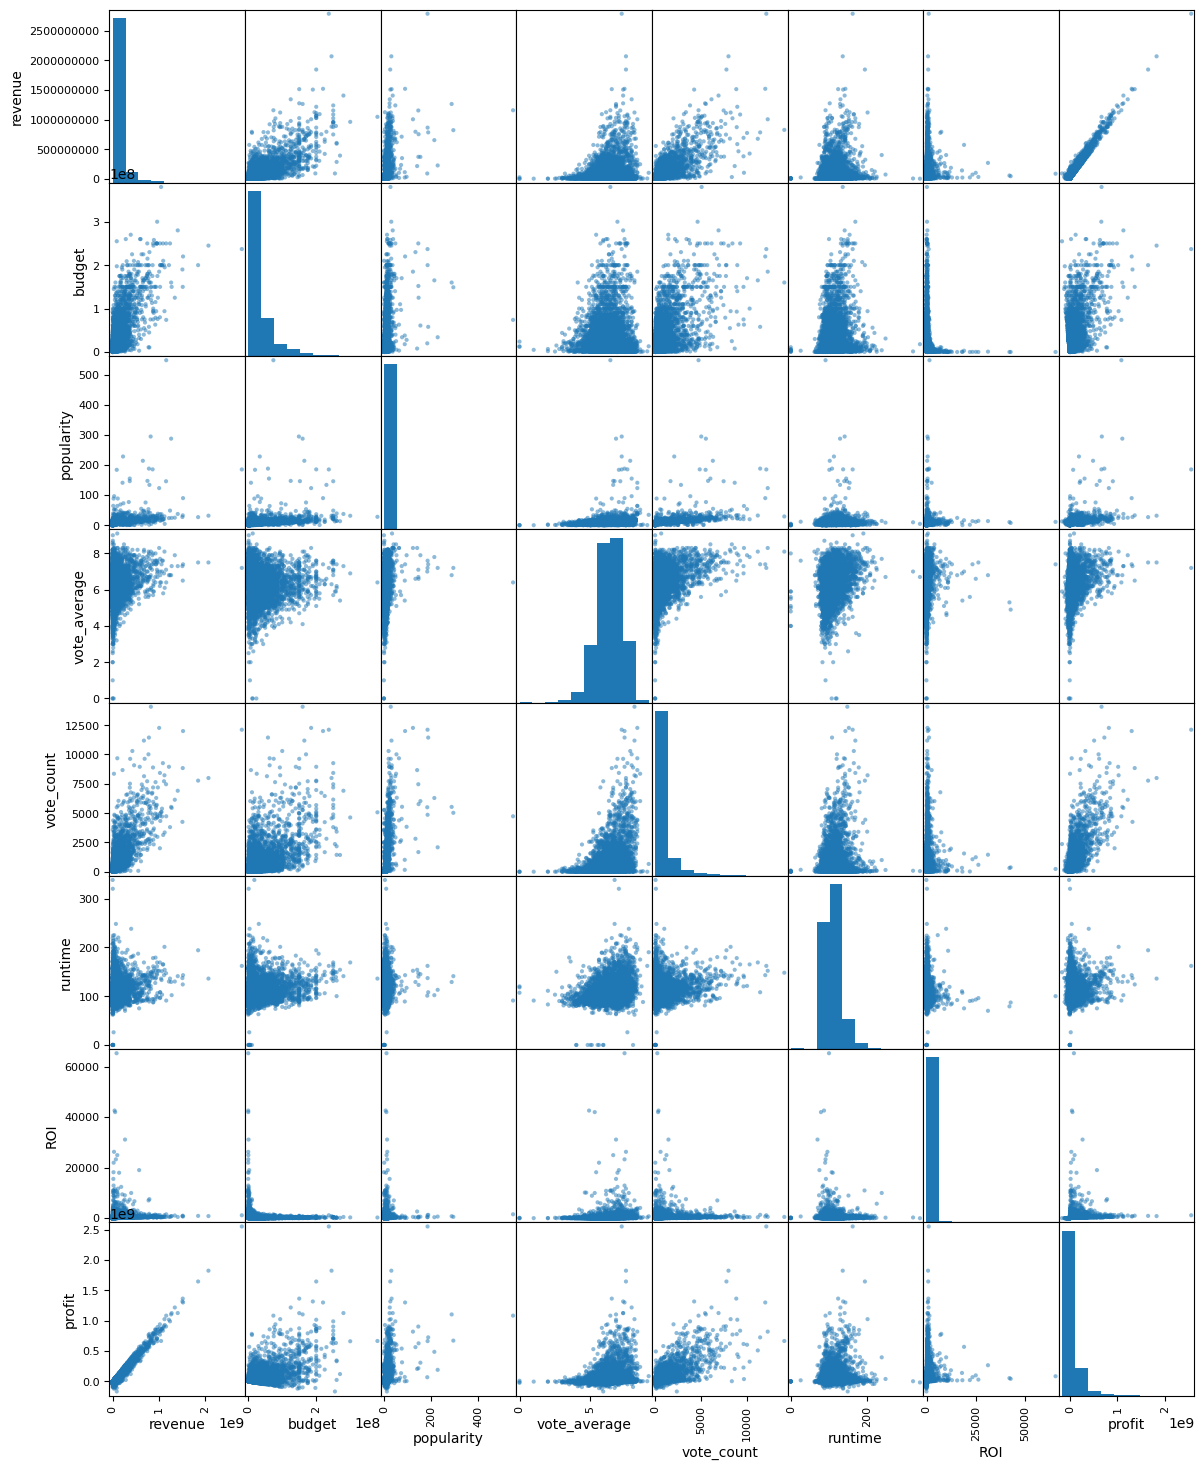

In [51]:
pd.plotting.scatter_matrix(df_New,figsize=(14,18));
plt.show()

> Ultimately, from the correlation matrix above, the following columns: vote_count, revenue, popularity and vote_average, contributes to the large form of success. It is important to note that that the 'revenue' column has the strongest positive correlation/relationship.                 

> A successful movie often results from a combination of these factors working harmoniously to create an engaging, emotional, and memorable cinematic experience that resonates with audiences.
<hr style="font-weight:900;">
<hr style="font-weight:900;">

**Research Question 5** (Investigate the relationship between a movie's budget and its revenue)

The relationship between a movie's budget and its revenue can vary significantly based on factors such as genre, vote_average, vote_count, etc. While there's no one-size-fits-all rule, understanding some general trends and patterns can provide insights into this relationship.

To answer this question I would use a scattered plot visualization to analyze the relationship between the Revenue and Budget columns

<Axes: title={'center': 'Relationship between Budget and Revenue'}, xlabel='revenue', ylabel='budget'>

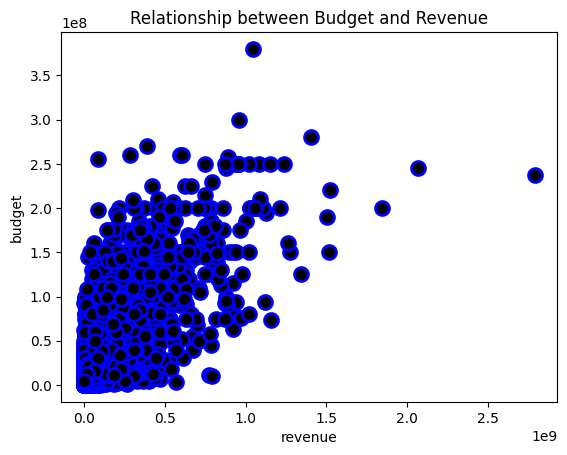

In [52]:
# code to run scattered plot, including colors and size for better understanding/finesse
df_New.plot.scatter(x = 'revenue', y = 'budget', title = "Relationship between Budget and Revenue", c = 'black',s = 100, edgecolor = 'blue', linewidth = 2)

>From the diagram above, we would notice that there's a correlation/relationship between a movie's budget and it's revenue, but a weak postive correlation. In summary, the relationship between a movie's budget and its revenue is complex and influenced by a combination of factors explained above. A successful movie can achieve various degrees of profitability, and its overall impact is often the result of careful consideration of budget allocation, popularity, genre choice and audience engagement (vote_average, vote_count).
<hr style="font-weight:900">
<hr style="font-weight:900">


**Research Question 6** (Which genre earns the most profit?)

To answer this question, major focus would be on the Genre and Revenue columns, visualization will also be done for better understanding. The 'genre' column contains a list and so we need to expand it within its column.


In [53]:
df_explode= df_New.explode('genres', ignore_index=True)
df_explode.head()

,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew,ROI,profit
0,373554033.0,Toy Story,30000000.0,Animation,21.946943,[Pixar Animation Studios],1995-10-30,7.7,5415.0,81.0,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],1145.18011,343554033.0
1,373554033.0,Toy Story,30000000.0,Comedy,21.946943,[Pixar Animation Studios],1995-10-30,7.7,5415.0,81.0,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],1145.18011,343554033.0
2,373554033.0,Toy Story,30000000.0,Family,21.946943,[Pixar Animation Studios],1995-10-30,7.7,5415.0,81.0,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],1145.18011,343554033.0
3,262797249.0,Jumanji,65000000.0,Adventure,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",1995-12-15,6.9,2413.0,104.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],304.30346,197797249.0
4,262797249.0,Jumanji,65000000.0,Fantasy,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",1995-12-15,6.9,2413.0,104.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],304.30346,197797249.0


In [54]:
# drop the cast and production_companies columns, a groupby function wouldn't be possible because they are also in list form
df_explode = df_explode.drop(columns= ['cast', 'production_companies'])
df_explode.head()

,revenue,title,budget,genres,popularity,release_date,vote_average,vote_count,runtime,crew,ROI,profit
0,373554033.0,Toy Story,30000000.0,Animation,21.946943,1995-10-30,7.7,5415.0,81.0,[John Lasseter],1145.18011,343554033.0
1,373554033.0,Toy Story,30000000.0,Comedy,21.946943,1995-10-30,7.7,5415.0,81.0,[John Lasseter],1145.18011,343554033.0
2,373554033.0,Toy Story,30000000.0,Family,21.946943,1995-10-30,7.7,5415.0,81.0,[John Lasseter],1145.18011,343554033.0
3,262797249.0,Jumanji,65000000.0,Adventure,17.015539,1995-12-15,6.9,2413.0,104.0,[Joe Johnston],304.30346,197797249.0
4,262797249.0,Jumanji,65000000.0,Fantasy,17.015539,1995-12-15,6.9,2413.0,104.0,[Joe Johnston],304.30346,197797249.0


Now the dataset would be grouped by the genre column and the total sum of their profit. Next is to sum up to find which genre has the highest profit.

In [55]:
# using a groupby function, group the dataset by 'genre' and 'total profit' columns
df_genres = df_explode.groupby('genres')['profit'].sum().reset_index(name ='Total_Profit')
#df_genres['Total_Profit'] = df_genres['Total_Profit'].astype('int64')
df_genres

,genres,Total_Profit
0,Action,1.266174e+11
1,Adventure,1.351635e+11
2,Animation,4.712256e+10
3,Comedy,1.026158e+11
4,Crime,3.626258e+10
5,Documentary,7.588175e+08
6,Drama,9.235655e+10
7,Family,7.312640e+10
8,Fantasy,7.012524e+10
9,Foreign,4.140720e+07


In [56]:
# sort by total profit
df_sort = df_genres.sort_values('Total_Profit', ascending=False)
df_sort.head(15)

,genres,Total_Profit
1,Adventure,1.351635e+11
0,Action,1.266174e+11
3,Comedy,1.026158e+11
6,Drama,9.235655e+10
17,Thriller,7.775137e+10
7,Family,7.312640e+10
8,Fantasy,7.012524e+10
15,Science Fiction,6.348282e+10
2,Animation,4.712256e+10
14,Romance,4.618518e+10


Text(0.5, 1.0, 'Movies with the highest Profit by Genre')

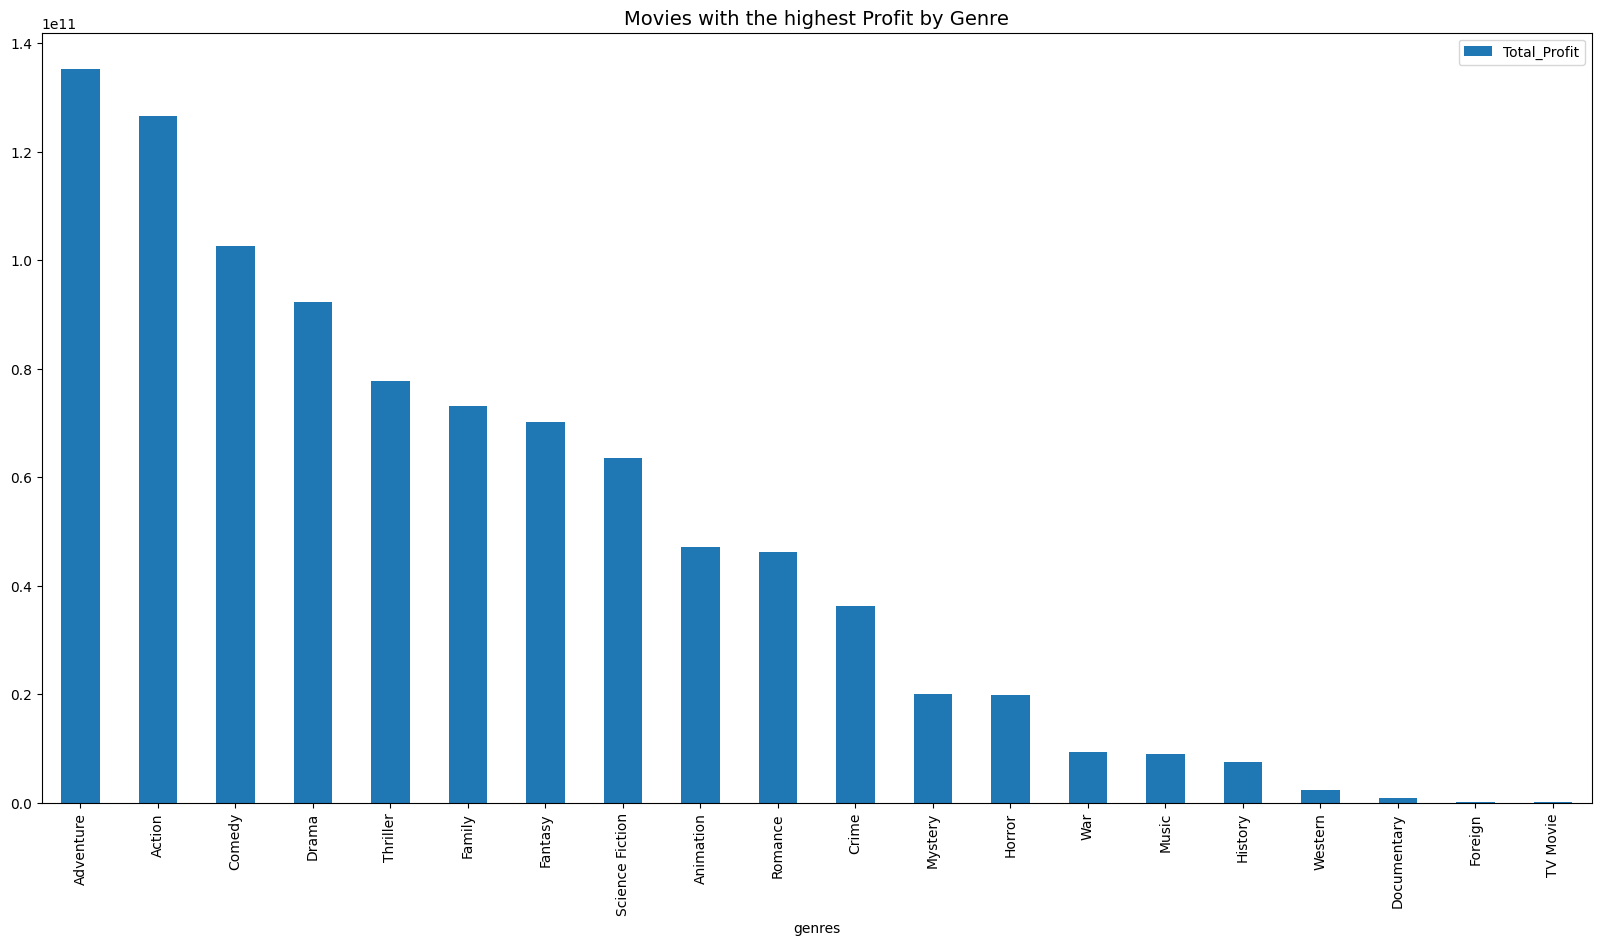

In [57]:
df_sort.plot(x="genres", y="Total_Profit",
        kind="bar", figsize=(20, 10))

plt.title('Movies with the highest Profit by Genre', fontsize=14)


>The above section shows us that, the 'Adventure' genre has generated highest profit.   
<hr style="font-weight:900"><hr style="font-weight:900">

***Research Question 7*** (Does Higher popularity means higher profits ?)
> In this section we tend to observe if higher popularity means higher profits

In [58]:
# calculation for the mean of popularity 
mean = df_New['popularity'].median()
lowest_popularity =  df_New.query('popularity < {}'.format(mean))
more_popularity =  df_New.query('popularity >= {}'.format(mean))

print(f'The mean of popularity is {mean}')


The mean of popularity is 8.627019


In [59]:
# average net profit for low_popularity and high_popularity
mean_profit_of_low = lowest_popularity['profit'].mean()
mean_profit_of_high = more_popularity['profit'].mean()


Text(0, 0.5, 'Average Profit')

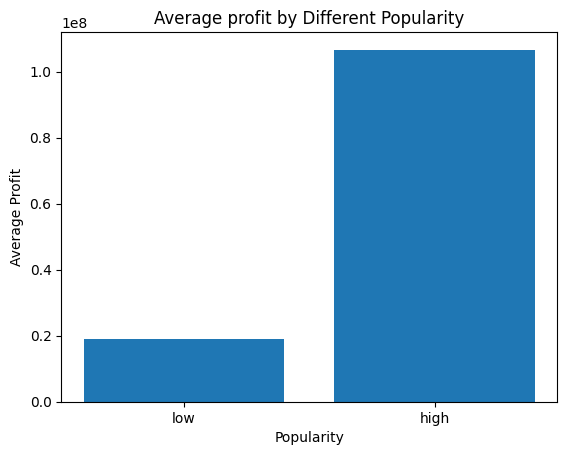

In [60]:
# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_profit_of_low, mean_profit_of_high]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average profit by Different Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profit')

>From the above bar graph we observe that higher popularity (above 8.970494) leads to more Average profit.

**Research Question 8** (Are there specific release dates or periods that tend to generate high revenues or better rating?)

To answer this question, focus would be on the Release_date, Vote_average, Vote_count and Revenue columns

In [61]:
df_New.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5079 entries, 0 to 45498
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   revenue               5079 non-null   float64       
 1   title                 5079 non-null   object        
 2   budget                5079 non-null   float64       
 3   genres                5079 non-null   object        
 4   popularity            5079 non-null   float64       
 5   production_companies  5076 non-null   object        
 6   release_date          5079 non-null   datetime64[ns]
 7   vote_average          5079 non-null   float64       
 8   vote_count            5079 non-null   float64       
 9   runtime               5079 non-null   float64       
 10  cast                  5079 non-null   object        
 11  crew                  5079 non-null   object        
 12  ROI                   5079 non-null   float64       
 13  profit                

In [62]:
# First you need to change the format of date column
df_New['release_date'] = pd.to_datetime(df_New.release_date, format='%Y-%m-%d')
df_New.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5079 entries, 0 to 45498
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   revenue               5079 non-null   float64       
 1   title                 5079 non-null   object        
 2   budget                5079 non-null   float64       
 3   genres                5079 non-null   object        
 4   popularity            5079 non-null   float64       
 5   production_companies  5076 non-null   object        
 6   release_date          5079 non-null   datetime64[ns]
 7   vote_average          5079 non-null   float64       
 8   vote_count            5079 non-null   float64       
 9   runtime               5079 non-null   float64       
 10  cast                  5079 non-null   object        
 11  crew                  5079 non-null   object        
 12  ROI                   5079 non-null   float64       
 13  profit                

In [63]:
# specify the format that should be used to parse the strings in the column
df_New['release_date'] = pd.to_datetime(df_New ['release_date'], errors='coerce')

In [64]:
#  create a new column in the DataFrame that stores the values of the months
df_New['Month'] = df_New['release_date'].dt.strftime('%m')
df_New.head()

,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew,ROI,profit,Month
0,373554033.0,Toy Story,30000000.0,"[Animation, Comedy, Family]",21.946943,[Pixar Animation Studios],1995-10-30,7.7,5415.0,81.0,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],1145.180110,343554033.0,10
1,262797249.0,Jumanji,65000000.0,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",1995-12-15,6.9,2413.0,104.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],304.303460,197797249.0,12
3,81452156.0,Waiting to Exhale,16000000.0,"[Comedy, Drama, Romance]",3.859495,[Twentieth Century Fox Film Corporation],1995-12-22,6.1,34.0,127.0,"[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker],409.075975,65452156.0,12
5,187436818.0,Heat,60000000.0,"[Action, Crime, Drama, Thriller]",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",1995-12-15,7.7,1886.0,170.0,"[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann],212.394697,127436818.0,12
8,64350171.0,Sudden Death,35000000.0,"[Action, Adventure, Thriller]",5.231580,"[Universal Pictures, Imperial Entertainment, S...",1995-12-22,5.5,174.0,106.0,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...",[Peter Hyams],83.857631,29350171.0,12


>8a. Are there specific release dates or periods that tend to generate high revenue?

In order to answer this, a groupby fuction would be done and then sort the columns in descending order.

In [65]:
# Assign the right seasons according to the months in a year
df_New['release_date'] = pd.to_datetime(df_New['release_date'])

seasons = { 1 : 'Winter', 2: 'Winter', 3:'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',  11: 'Fall', 12: 'Winter'}
df_New['season']= df_New['release_date'].dt.month.map(seasons)
grouped_seasons = df_New.groupby('season')

for season,group in grouped_seasons :
  print(group)

           revenue                           title      budget  \
0      373554033.0                       Toy Story  30000000.0   
9      352194034.0                       GoldenEye  58000000.0   
10     107879496.0          The American President  62000000.0   
15     116112375.0                          Casino  52000000.0   
18     212385533.0  Ace Ventura: When Nature Calls  30000000.0   
...            ...                             ...         ...   
44213    9713500.0                 Hitler's Kaput!   3000000.0   
44499   22000000.0                       Mudhalvan   7400000.0   
45485    1328612.0                         Savages    800000.0   
45488    1268793.0                     Pro Lyuboff   2000000.0   
45498    1413000.0                         Antidur   5000000.0   

                                 genres  popularity  \
0           [Animation, Comedy, Family]   21.946943   
9         [Adventure, Action, Thriller]   14.686036   
10             [Comedy, Drama, Romance]   

In [66]:
df_New.head()

,revenue,title,budget,genres,popularity,production_companies,release_date,vote_average,vote_count,runtime,cast,crew,ROI,profit,Month,season
0,373554033.0,Toy Story,30000000.0,"[Animation, Comedy, Family]",21.946943,[Pixar Animation Studios],1995-10-30,7.7,5415.0,81.0,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],1145.180110,343554033.0,10,Fall
1,262797249.0,Jumanji,65000000.0,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",1995-12-15,6.9,2413.0,104.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],304.303460,197797249.0,12,Winter
3,81452156.0,Waiting to Exhale,16000000.0,"[Comedy, Drama, Romance]",3.859495,[Twentieth Century Fox Film Corporation],1995-12-22,6.1,34.0,127.0,"[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker],409.075975,65452156.0,12,Winter
5,187436818.0,Heat,60000000.0,"[Action, Crime, Drama, Thriller]",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",1995-12-15,7.7,1886.0,170.0,"[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann],212.394697,127436818.0,12,Winter
8,64350171.0,Sudden Death,35000000.0,"[Action, Adventure, Thriller]",5.231580,"[Universal Pictures, Imperial Entertainment, S...",1995-12-22,5.5,174.0,106.0,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...",[Peter Hyams],83.857631,29350171.0,12,Winter


In [67]:
# Grouping revenue and release_date based on the seasons
movies_sub= df_New[['release_date','revenue', 'season']]
grouped_by_season = movies_sub.groupby('season').agg({'release_date': 'count', 'revenue':'sum' })
grouped_seasons_columns = ['number of movies', 'total_revenue']
grouped_by_season.reset_index(inplace=True)
print(grouped_by_season)

   season  release_date       revenue
0    Fall          1424  1.096260e+11
1  Spring          1149  1.241152e+11
2  Summer          1303  1.480241e+11
3  Winter          1203  1.037536e+11


In [68]:
# sort the new data frame (grouped_by_season) by the total revenue in descending order
df_Result = grouped_by_season.sort_values(by="revenue", ascending=False).head(10)
print(df_Result)

   season  release_date       revenue
2  Summer          1303  1.480241e+11
1  Spring          1149  1.241152e+11
0    Fall          1424  1.096260e+11
3  Winter          1203  1.037536e+11


<Axes: xlabel='season'>

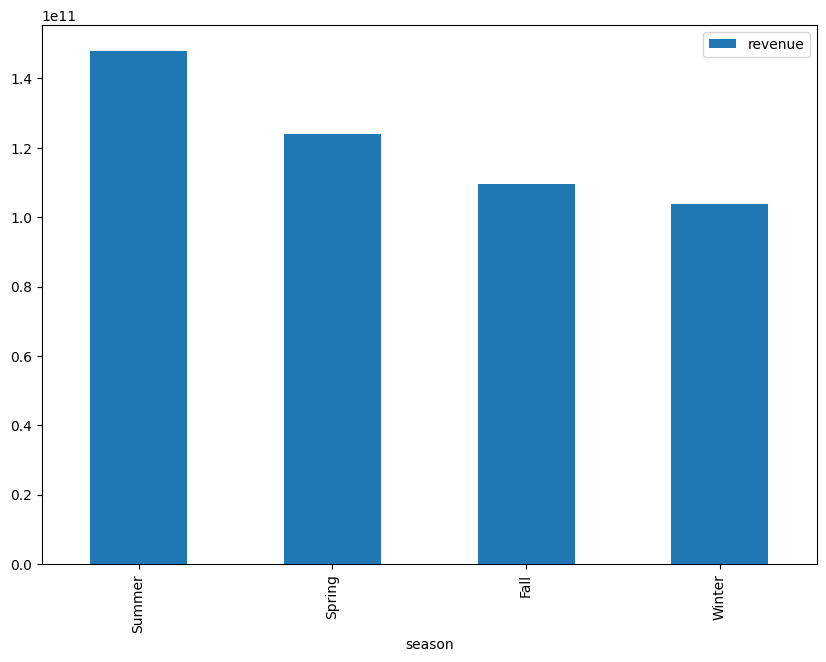

In [69]:
df_Result.plot(x="season", y="revenue",
        kind="bar", figsize=(10, 7))

>From the Viz above one can conclude that movies produced in the **summer** period have higher revenue than other seasons in a year.

>8b. Are there specific release dates or periods that tend to generate better ratings?

To answer this question, the data frame would be grouped by the release dates (months) column and the total vote count.

In [70]:
# Grouping vote counts and release_date based on the seasons
movies_votes = df_New[['release_date','vote_count', 'season']]
grouped_by_votes = movies_votes.groupby('season').agg({'release_date': 'count', 'vote_count':'sum' })
grouped_votes_columns = ['number of movies', 'total_vote_count']
grouped_by_votes.reset_index(inplace=True)
print(grouped_by_votes)

   season  release_date  vote_count
0    Fall          1424   1033609.0
1  Spring          1149    958659.0
2  Summer          1303   1096429.0
3  Winter          1203    823076.0


In [71]:
# sort the new data frame (grouped_by_votes) by the total vote_count in descending order
df_Vote_count = grouped_by_votes.sort_values(by="vote_count", ascending=False).head(10)
print(df_Vote_count)

   season  release_date  vote_count
2  Summer          1303   1096429.0
0    Fall          1424   1033609.0
1  Spring          1149    958659.0
3  Winter          1203    823076.0


<Axes: xlabel='season'>

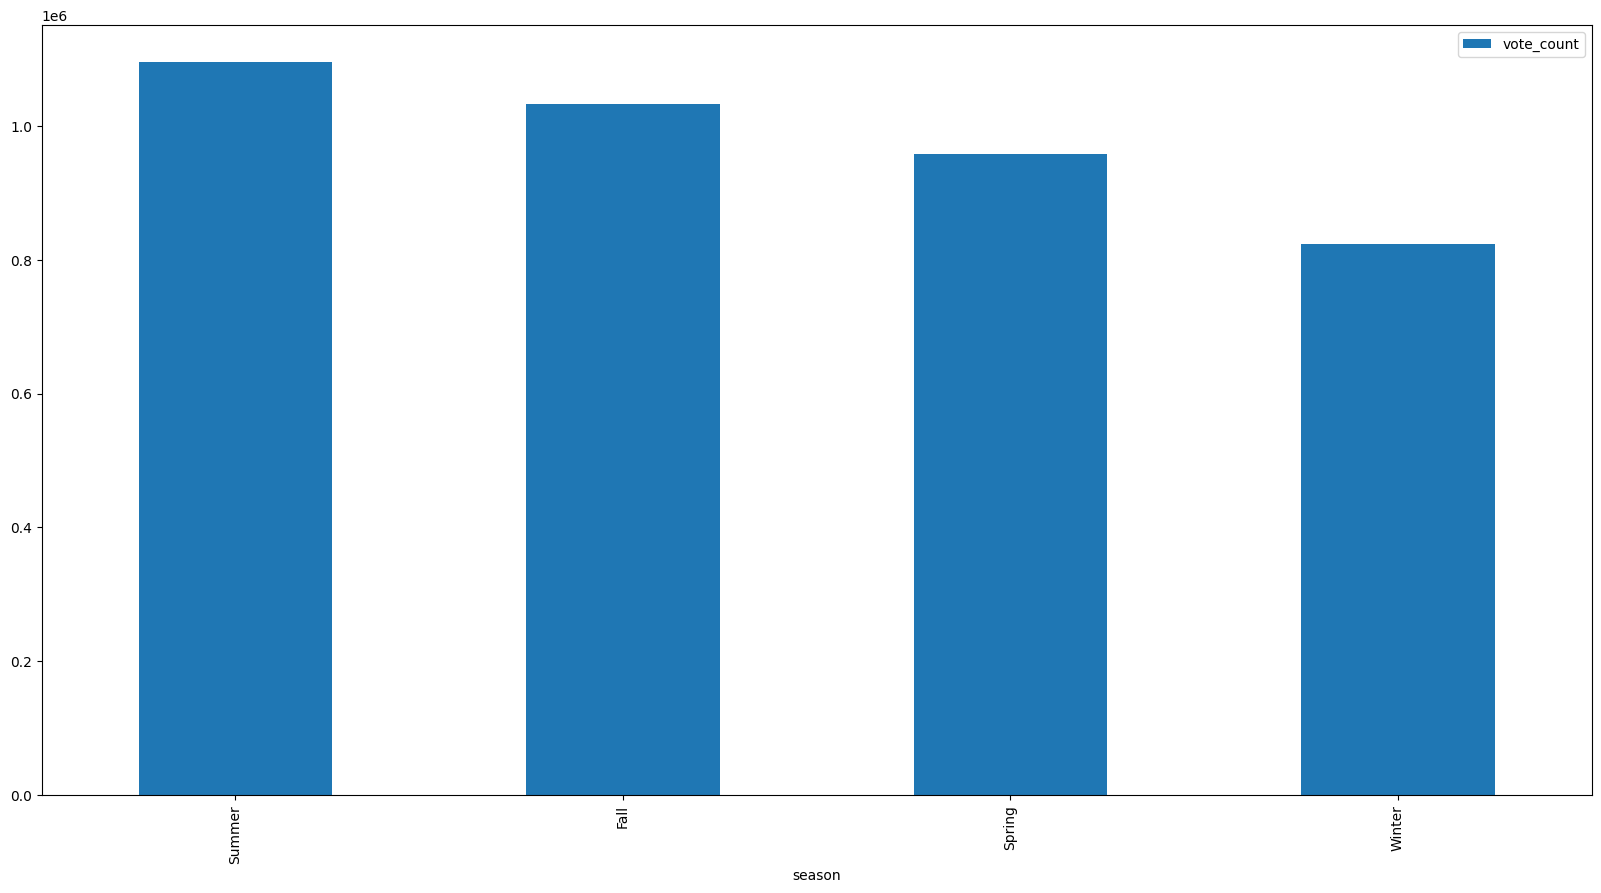

In [72]:
df_Vote_count.plot(x="season", y="vote_count", 
                   kind="bar", 
                    figsize=(20, 10))
# figsize(20, 10))

>From the release date sorted above, it is safe to say, movies produced in the summer period have higher vote counts than other seasons in a year.

**Research Question 9** (Do longer movies have better rating or higher revenue?)

To answer this question, we would analyze the Runtime, Vote_average and revenue columns.

>9a. Do longer movies have better rating ?
Here we would analyze the runtime and vote_average column

In [73]:
# using a groupby function, group the dataset by 'runtime' and 'total_vote average' columns
df_group = df_New.groupby('runtime')['vote_average'].sum().reset_index(name ='Total_vote average')
print(df_group)

     runtime  Total_vote average
0        0.0                53.8
1       26.0                 7.6
2       62.0                 8.1
3       63.0                 6.8
4       64.0                 6.8
..       ...                 ...
148    225.0                 7.1
149    238.0                 7.7
150    248.0                 6.7
151    320.0                 7.0
152    338.0                 6.7

[153 rows x 2 columns]


In [74]:
# first is to sort the new data frame by total_vote average in descending order
df_grouped = df_group.sort_values(by="Total_vote average", ascending=False)
df_grouped.head(10)

,runtime,Total_vote average
39,100.0,952.9
44,105.0,775.1
36,97.0,755.2
37,98.0,745.9
47,108.0,734.6
32,93.0,733.6
35,96.0,729.8
52,113.0,717.1
45,106.0,712.0
38,99.0,711.6


In [75]:
# Group the Runtime to 2 groups
runtime_med = df_grouped['runtime'].median()
runtime_high = df_grouped.query('runtime > {}'.format(runtime_med))
runtime_low = df_grouped.query('runtime < {}'.format(runtime_med))

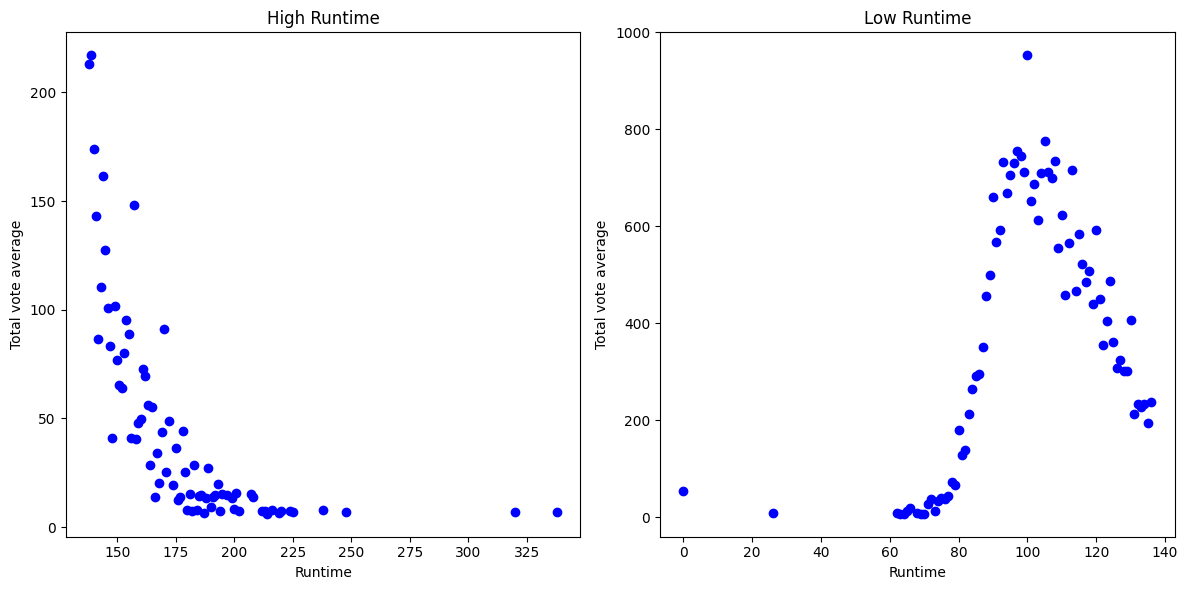

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for higher runtime above the median
ax1.scatter(runtime_high['runtime'], runtime_high['Total_vote average'], color='blue', label='Higher runtime above the median')
ax1.set_title('High Runtime')
ax1.set_xlabel('Runtime')
ax1.set_ylabel('Total vote average')

# Scatter plot for lower runtime below the median
ax2.scatter(runtime_low['runtime'], runtime_low['Total_vote average'], color='blue', label='Lower runtime below the median')
ax2.set_title('Low Runtime')
ax2.set_xlabel('Runtime') 
ax2.set_ylabel('Total vote average')

plt.tight_layout()
plt.show()

>Ultimately, movies with runtime  between 100 minutes and 150 minuets, has higher vote average in total, than movies below a 100 minutes and above 150.

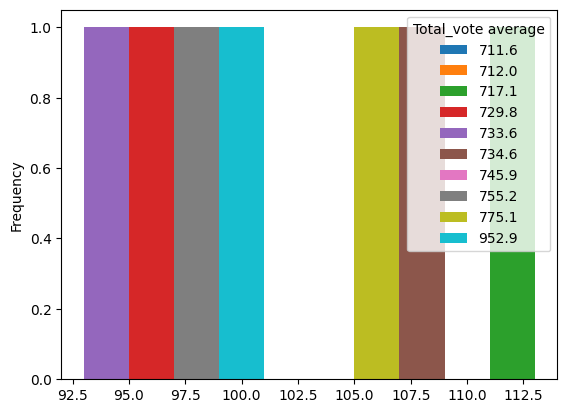

In [77]:
df_grouped.head(10).pivot(columns='Total_vote average', values='runtime').plot.hist()
plt.show()

9b. Do longer movies have higher revenue ?

Here we would analyze the runtime and revenue column

In [78]:
# using a groupby function, group the dataset by 'runtime' and 'total revenue' columns
df_revenue = df_New.groupby('runtime')['revenue'].sum().reset_index(name ='Total revenue')
print(df_revenue)

     runtime  Total revenue
0        0.0     45364327.0
1       26.0     21000000.0
2       62.0      1000000.0
3       63.0     14460000.0
4       64.0      1600000.0
..       ...            ...
148    225.0     34505110.0
149    238.0    400176459.0
150    248.0     71000000.0
151    320.0      4100000.0
152    338.0       871279.0

[153 rows x 2 columns]


In [79]:
# first is to sort the new data frame by total revenue in descending order
df_revenue = df_revenue.sort_values(by="Total revenue", ascending=False)
df_revenue.head(10)

,runtime,Total revenue
47,108.0,1.183247e+10
54,115.0,1.149044e+10
39,100.0,1.137098e+10
63,124.0,1.106654e+10
69,130.0,1.085261e+10
32,93.0,1.044107e+10
45,106.0,1.009741e+10
75,136.0,9.849748e+09
46,107.0,9.795041e+09
37,98.0,9.633111e+09


In [80]:
# Group the Runtime to 2 groups
r_runtime_med = df_revenue['runtime'].median()
r_runtime_high = df_revenue.query('runtime > {}'.format(runtime_med))
r_runtime_low = df_revenue.query('runtime < {}'.format(runtime_med))

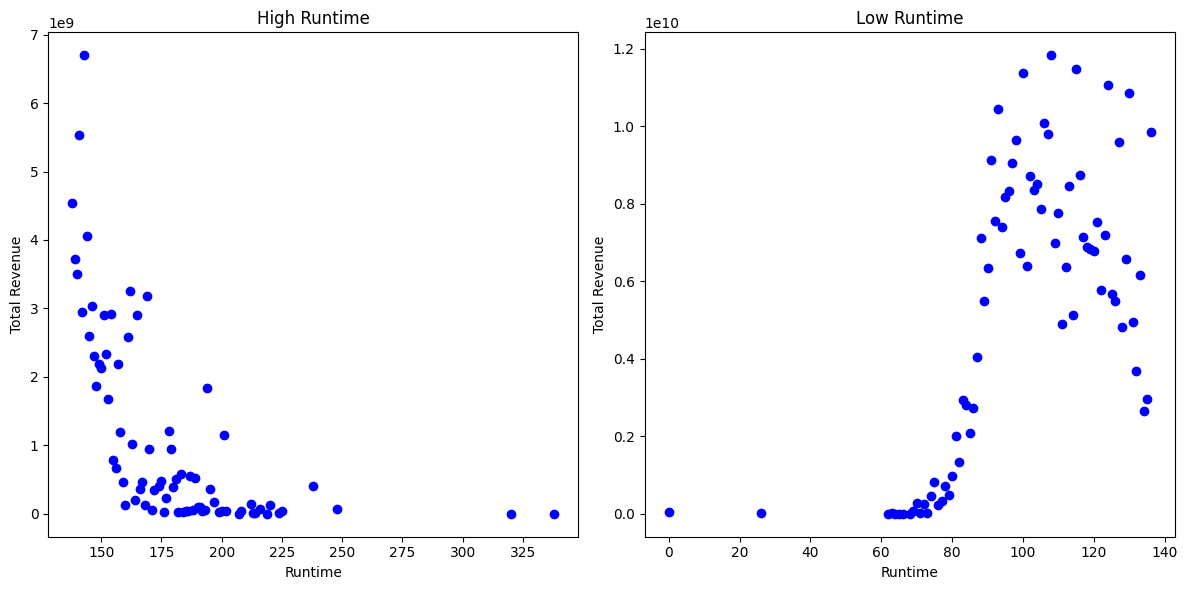

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for higher runtime above the median
ax1.scatter(r_runtime_high['runtime'], r_runtime_high['Total revenue'], color='blue', label='Higher runtime above the median')
ax1.set_title('High Runtime')
ax1.set_xlabel('Runtime')  # Corrected method name
ax1.set_ylabel('Total Revenue')

# Scatter plot for lower runtime below the median
ax2.scatter(r_runtime_low['runtime'], r_runtime_low['Total revenue'], color='blue', label='Lower runtime below the median')
ax2.set_title('Low Runtime')
ax2.set_xlabel('Runtime')  # Corrected method name
ax2.set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()

> Ultimately, movies with runtime between 100 minutes & 150 minutes, has higher revenue in total, than movies below a 100 minutes and above 150 minutes.

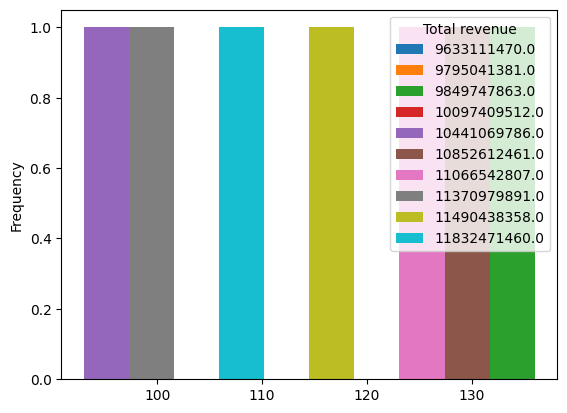

In [82]:
df_revenue.head(10).pivot(columns='Total revenue', values='runtime').plot.hist()
plt.show()

> It is visualy clear that movies around 110 has the highest revenues

**Research Question 10** (What are the Features Associated with Top 10 Profit Movies?)

> In this section I would try to determine what is peculiar to the top 10 most profitable movies

array([[<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'vote_count'}>],
       [<Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'ROI'}>,
        <Axes: title={'center': 'profit'}>]], dtype=object)

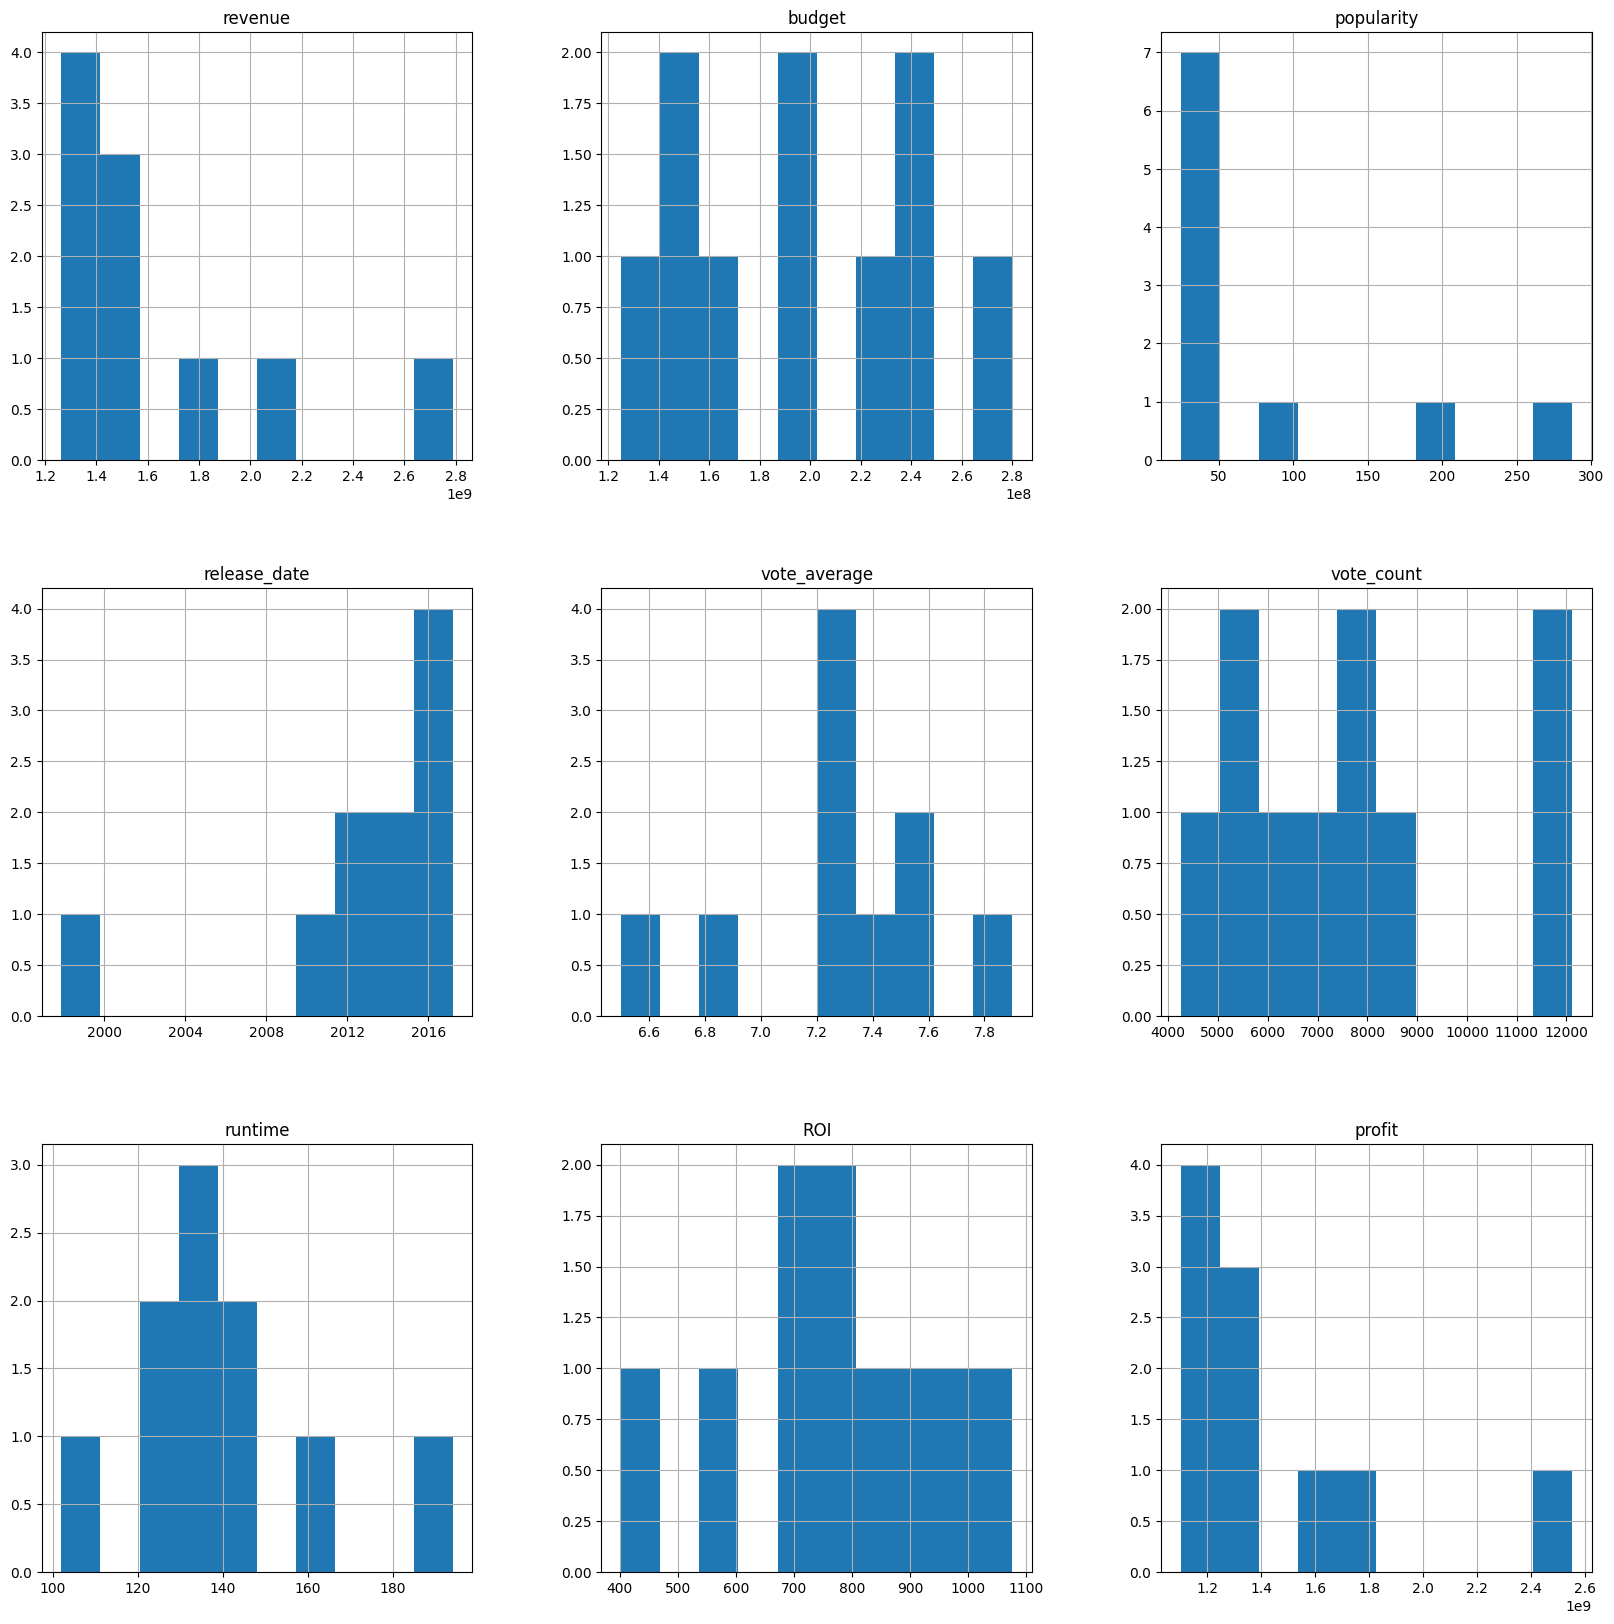

In [83]:
top10_profit = df_New.nlargest(10,'profit')
top10_profit.hist(figsize=(20,20))

> With the above Viz, one can deduce that runtime between 100 to 200 are must profitable movies(Top 10),  ROI between 400 to 1100 appeared in the top 10 and the most profitable period is between 1998 to 2018

# **Conclusion**
>The Project was motivated by the strong wish to observe what makes a movie succesful. One can from this analysis deduce that the best period to release a movie is in the Summer, One can also deduce that the higher the budget the higher the popularity, It was also understood that movies' runtime between 100 minutes and 180 minutes is more successful. It was also understood that longer movies has higher ratings and higher revenue.

> One could use this data to give insights to investors on which movies to invest in(Using this analysis to factor what may determine the succes of such movie)

# **THANK YOU**

<img src="./logo.png" width="5%">